In [1]:
!wget https://www.spataru.at/students/course_files/week4/loan.csv

--2021-01-18 12:03:18--  https://www.spataru.at/students/course_files/week4/loan.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv.2’

loan.csv.2          100%[===================>]  37.12K  --.-KB/s    in 0.1s    

2021-01-18 12:03:18 (265 KB/s) - ‘loan.csv.2’ saved [38013/38013]



In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [3]:
df = pd.read_csv("loan.csv")

# EDA

In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.Loan_Status.value_counts()[0]/df.shape[0]

0.6872964169381107

In [7]:
px.bar(data_frame=df, x="Loan_Status")

In [8]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Loan_Status")

In [9]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Education")

In [10]:
df.Gender.isna().sum()

13

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

In [13]:
impute = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [14]:
df[categorical_features] = impute.fit_transform(df[categorical_features])

In [15]:
df.Gender.isna().sum()

0

In [16]:
df[["LoanAmount"]]

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [17]:
df["LoanAmount"] = impute.fit_transform(df[["LoanAmount"]])

In [18]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df = df.drop("Loan_ID", axis=1)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
df["Gender"] = df["Gender"].astype("category")

In [22]:
for col in categorical_features:
  df[col] = df[col].astype("category")

# Split Input and Output

In [23]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1


In [25]:
df["Loan_Amount_Term"] = impute.fit_transform(df[["Loan_Amount_Term"]])

In [26]:
X = df[df.columns[:-1]]

In [27]:
y = df[[df.columns[-1]]]

# Decision Tree

In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(145.6041329479769, 211.7178947368421, 'X[11] <= 0.5\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(28.64184971098266, 200.2736842105263, 'X[2] <= 547.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(25.545433526011564, 188.82947368421054, 'X[1] <= 8115.0\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(17.03028901734104, 177.38526315789474, 'X[0] <= 4316.5\ngini = 0.11\nsamples = 86\nvalue = [81, 5]'),
 Text(9.289248554913296, 165.94105263157894, 'X[3] <= 240.0\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(6.192832369942197, 154.49684210526317, 'X[0] <= 2546.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(3.0964161849710985, 143.05263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.289248554913296, 143.05263157894737, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(12.385664739884394, 154.49684210526317, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(24.771329479768788, 165.94105263157894, 'X[0] <= 4934.0\ngini = 0.219\nsam

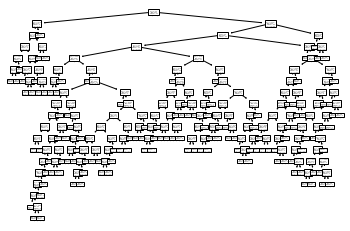

In [30]:
tree.plot_tree(model)

# Evaluation

# K-Folds Cross Validation